# **Model Notebook for _CHILD DETECTOR_**

In [1]:
    ## Import Libraries

    import pandas as pd

    import tensorflow as tf

    import numpy as np

    import seaborn as sns
    import cv2
    from matplotlib import pyplot as plt

    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Flatten
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.layers import Dense,MaxPooling2D,MaxPool2D,Conv2D
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input,Activation,Add
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
    from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.models import Sequential
    from tensorflow.keras import datasets, layers, models
    from tensorflow.keras import utils

    import scipy
    from scipy import stats
    from scipy.stats import norm

    from pathlib import Path
    import os.path

    import itertools

    import skimage

    import random

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_25856\3769437044.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **Load Data**

In [2]:
base_dir  = "C:\\Users\\Abhinay\\OneDrive\\Desktop\\Child_Detector\\"
os.chdir(base_dir)

In [3]:
train_path=base_dir+'train\\'
test_path= base_dir+'test\\'

In [4]:
os.listdir(train_path)

['adults', 'children']

In [5]:
os.listdir(test_path)

['adults', 'children']

In [6]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 2
train_len = 680

# Create a dictionary to map folder names to labels
label_map = {'children': 1, 'adults': 0}

def load_image(file_path):
    img = cv2.imread(file_path)
    if img is None:
        return None
    img = skimage.transform.resize(img, (imageSize, imageSize, 3))
    return img

def get_data(folder, label_map):
    X = []
    y = []
    
    for folderName in os.listdir(folder):
        if folderName not in label_map:
            continue  # Skip folders that are not in the mapping
        label = label_map[folderName]
        
        folder_path = os.path.join(folder, folderName)
        
        for image_filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_filename)
            img = load_image(image_path)
            
            if img is not None:
                X.append(img)
                y.append(label)
    
    return np.array(X), np.array(y)

X_train, y_train = get_data(train_path, label_map)
print("Images successfully imported...")

Images successfully imported...


In [7]:
## Defining Child and Adult Path

train_child_path=train_path+'children/'
train_adult_path=train_path+'adults/'

In [8]:
print("Displaying content of Children Folder")

os.listdir(train_child_path)

Displaying content of Children Folder


['100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 '176.jpg',
 '177.jpg',
 '178.jpg',
 '179.jpg',
 '180.jpg',
 '181.jpg',
 '182.jpg',
 '18

In [9]:
print("Displaying content of Adults Folder")

os.listdir(train_adult_path)

Displaying content of Adults Folder


['100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 '176.jpg',
 '177.jpg',
 '178.jpg',
 '179.jpg',
 '180.jpg',
 '181.jpg',
 '182.jpg',
 '18

In [10]:
from skimage.io import imread

In [11]:
## Access an image from Children

print("Accessing an image of Child")
os.listdir(train_child_path)[10]

Accessing an image of Child


'110.jpg'

In [12]:
'''Displaying a Child Image'''

child=train_child_path+'110.jpg'
imread(child).shape

(320, 370, 3)

Displaying Image


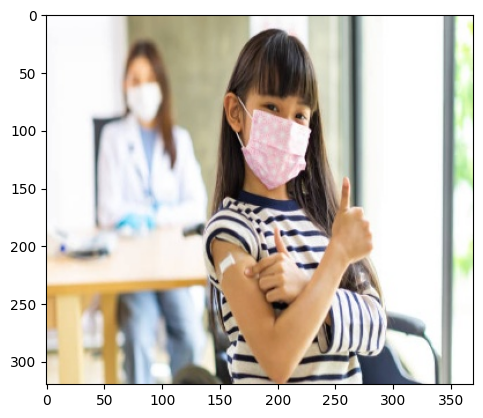

In [13]:
print("Displaying Image")
plt.imshow(imread(child))

In [14]:
## Access an Adult Image
 
print("Accessing an image of an Adult")
os.listdir(train_adult_path)[16]

Accessing an image of an Adult


'116.jpg'

In [15]:
'''Displaying an Adult Image'''

adult=train_adult_path+'116.jpg'
imread(adult).shape

(320, 370, 3)

Displaying Image


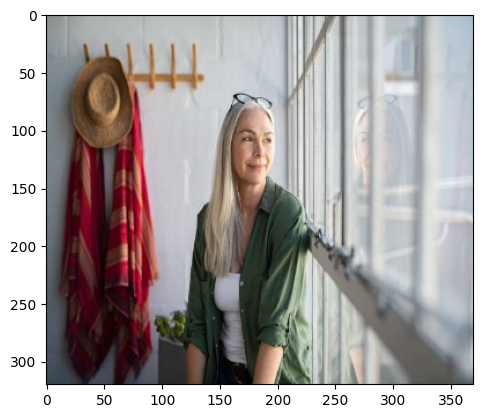

In [16]:
print("Displaying Image")
plt.imshow(imread(adult))

In [17]:
print("No.of Train Child Images")
len(os.listdir(train_child_path))

No.of Train Child Images


340

In [18]:
print("No.of Train adult Images")
len(os.listdir(train_adult_path))

No.of Train adult Images


340

In [19]:
print("No.of Test children Images")
len(os.listdir(test_path+'children'))

No.of Test children Images


60

In [20]:
print("No.of Test adult Images")
len(os.listdir(test_path+'adults'))

No.of Test adult Images


60

In [21]:
## Converting images and assigned labels into a Dataframe 

train_folder = train_path
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df = pd.DataFrame(all_data)
df

,Path,Label
0,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
1,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
2,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
3,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
4,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
...,...,...
675,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
676,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
677,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
678,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children


In [22]:
## Converting images and assigned labels into a Dataframe 

test_folder = test_path
all_data = []
for folder in os.listdir(test_folder):
    
    label_folder = os.path.join(test_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df1= pd.DataFrame(all_data)
df1

,Path,Label
0,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
1,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
2,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
3,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
4,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
...,...,...
115,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
116,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
117,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
118,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children


### **Data Visualization**

In [23]:
classes = ['children', 'adults']

<Figure size 640x480 with 0 Axes>

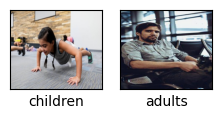

In [24]:
## Display sample images

def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(14,10))

    for i in range (0,2):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_path + "{0}/100.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_25856\676214985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(vc.index), y = vc,palette="rocket")


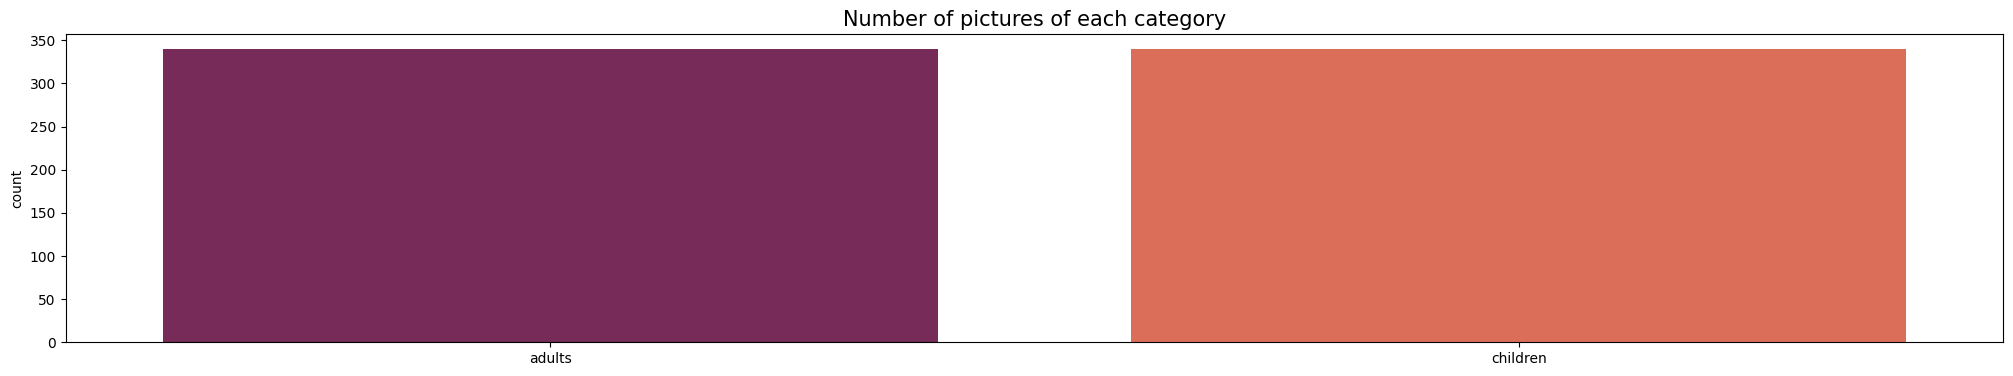

In [25]:
## Plotting count of images per each label in Train data

vc = df['Label'].value_counts()
plt.figure(figsize=(25,4))
sns.barplot(x = sorted(vc.index), y = vc,palette="rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_25856\1592049469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(vc.index), y = vc,palette="Spectral")


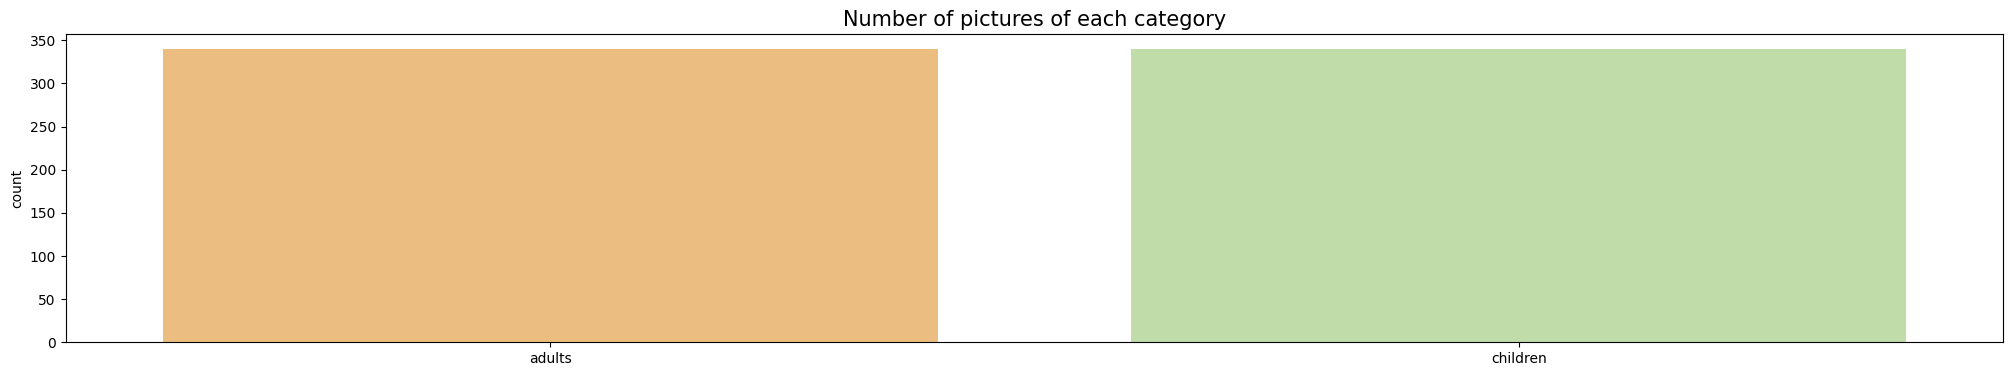

In [26]:
## Plotting count of images per each label on test data

vc1 = df1['Label'].value_counts()
plt.figure(figsize=(25,4))
sns.barplot(x = sorted(vc.index), y = vc,palette="Spectral")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [28]:
imread(child).max()

255

### **Data Pre-Processing**

In [29]:
"Creating new variables to avoid data mutation and maintaining code clarity"

X_data = X_train
y_data = y_train

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
# One-Hot-Encoding the categorical data

y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [33]:
print(X_train.shape)
print(y_train.shape)  
print(X_test.shape)   
print(y_test.shape)   
print(y_cat_train.shape)
print(y_cat_test.shape)   

(476, 64, 64, 3)
(476,)
(204, 64, 64, 3)
(204,)
(476, 29)
(204, 29)


In [34]:
# Garbage Collector (gc) is responsible for cleaning up and freeing memory that is no longer in use
import gc
del X_data
del y_data
gc.collect()
# This practice helps prevent memory-related errors and keeps your code running smoothly.

2794

### **Defining Neural Network _(CNN)_**

In [35]:
model = Sequential()  # Create a sequential model

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))  # 32 filters, filter size (3, 3), input shape (64, 64, 3)
model.add(BatchNormalization())  # Apply batch normalization
model.add(Activation('relu'))  # Apply ReLU activation
model.add(MaxPooling2D((2, 2)))  # Apply max pooling with pool size (2, 2)

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3)))  # 64 filters, filter size (3, 3)
model.add(BatchNormalization())  # Apply batch normalization
model.add(Activation('relu'))  # Apply ReLU activation
model.add(MaxPooling2D((2, 2)))  # Apply max pooling with pool size (2, 2)

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3)))  # 128 filters, filter size (3, 3)
model.add(BatchNormalization())  # Apply batch normalization
model.add(Activation('relu'))  # Apply ReLU activation
model.add(MaxPooling2D((2, 2)))  # Apply max pooling with pool size (2, 2)

model.add(Flatten())  # Flatten the output from the convolutional layers

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))  # Dense layer with 256 units and ReLU activation
model.add(Dropout(0.5))  # Apply dropout with a rate of 0.5 to reduce overfitting

# Fully Connected Layer 2 (Output Layer)
model.add(Dense(2, activation='softmax'))

model.summary()  # Display a summary of the model's architecture



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)       

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
# Compile the model with the defined optimizer, loss function, and evaluation metrics.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

history = model.fit(X_train, y_cat_train, epochs=250, batch_size=32,validation_data=(X_test, y_cat_test))

Epoch 1/250
15/15 [==============================] - 1s 59ms/step - loss: 0.0033 - accuracy: 0.9895 - val_loss: 0.1627 - val_accuracy: 0.5784
Epoch 2/250
15/15 [==============================] - 1s 74ms/step - loss: 0.0015 - accuracy: 0.9979 - val_loss: 0.1572 - val_accuracy: 0.5833
Epoch 3/250
15/15 [==============================] - 1s 72ms/step - loss: 0.0013 - accuracy: 0.9958 - val_loss: 0.1450 - val_accuracy: 0.6324
Epoch 4/250
15/15 [==============================] - 1s 74ms/step - loss: 0.0014 - accuracy: 0.9916 - val_loss: 0.1147 - val_accuracy: 0.6520
Epoch 5/250
15/15 [==============================] - 1s 72ms/step - loss: 9.2523e-04 - accuracy: 0.9979 - val_loss: 0.1935 - val_accuracy: 0.5931
Epoch 6/250
15/15 [==============================] - 1s 76ms/step - loss: 0.0014 - accuracy: 0.9958 - val_loss: 0.1495 - val_accuracy: 0.6324
Epoch 7/250
15/15 [==============================] - 1s 75ms/step - loss: 0.0030 - accuracy: 0.9832 - val_loss: 0.1265 - val_accuracy: 0.6078
Ep

In [66]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics.tail(5)

The model metrics are


,loss,accuracy,val_loss,val_accuracy
245,7.713455e-06,1.0,0.217178,0.632353
246,4.750431e-05,1.0,0.216280,0.637255
247,2.300287e-04,1.0,0.215272,0.637255
248,6.753438e-07,1.0,0.215179,0.642157
249,3.530483e-05,1.0,0.213774,0.647059


### **Accuracy and Loss**

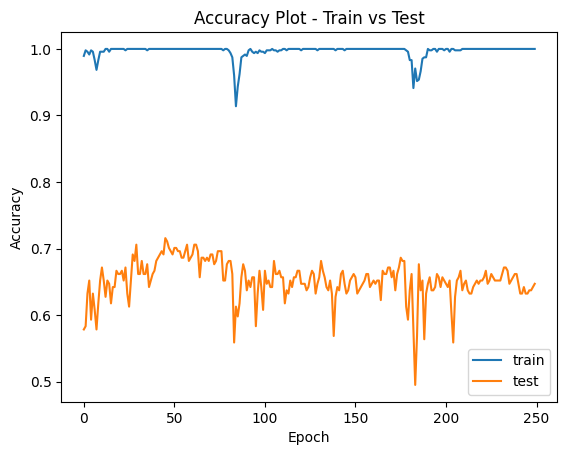

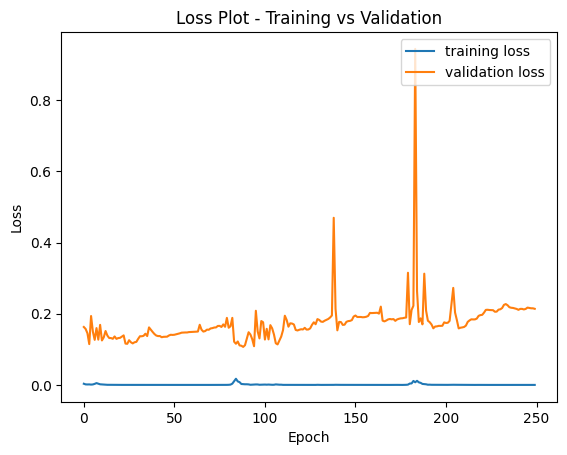

In [67]:
plt.plot(metrics['accuracy'])  # Plot training accuracy
plt.plot(metrics['val_accuracy'])  # Plot testing accuracy
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy Plot - Train vs Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plotting training and validation loss
plt.plot(metrics['loss'])  # Plots training loss
plt.plot(metrics['val_loss'])  # Plots validation loss
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.title('Loss Plot - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<Axes: >

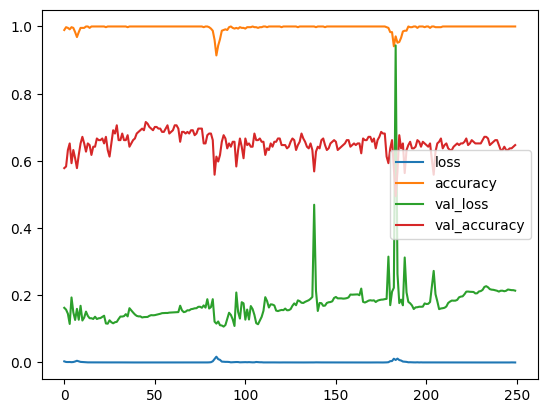

In [68]:
metrics.plot()

In [69]:
# Model Evaluation
evaluate_metrics = model.evaluate(X_test,y_cat_test,verbose=0)

# Print the evaluation results
print("Evaluation Accuracy = {:.2f}%".format(evaluate_metrics[1] * 100))
print("Evaluation Loss = {:.6f}".format(evaluate_metrics[0]))

Evaluation Accuracy = 64.71%
Evaluation Loss = 0.213774


In [70]:
pred=model.predict(X_test)
pred

7/7 [==============================] - 0s 18ms/step


array([[6.1706257e-10, 1.0000000e+00, 3.4910915e-21, ..., 5.1425027e-21,
        1.8152020e-20, 7.0128134e-22],
       [2.3551412e-17, 1.0000000e+00, 6.5520513e-26, ..., 5.2395397e-25,
        7.2419024e-25, 1.3051508e-24],
       [1.1185279e-18, 1.0000000e+00, 2.4770978e-26, ..., 6.0042753e-25,
        1.1301563e-24, 4.2200898e-25],
       ...,
       [6.5435351e-18, 1.0000000e+00, 2.8148649e-26, ..., 3.6566002e-26,
        9.8228625e-25, 2.3056006e-25],
       [1.0000000e+00, 3.4046661e-16, 2.4656272e-24, ..., 1.3276967e-26,
        6.6685481e-26, 2.0865233e-25],
       [2.1527116e-01, 7.8472888e-01, 2.4269438e-18, ..., 1.7876934e-19,
        3.5516339e-19, 4.3305221e-19]], dtype=float32)

In [71]:
predictions=pred>0.5

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
predicted_classes = np.argmax(predictions, axis=1)

result=classification_report(np.argmax(y_cat_test, axis=1), predicted_classes)
print(result)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       102
           1       0.66      0.62      0.64       102

    accuracy                           0.65       204
   macro avg       0.65      0.65      0.65       204
weighted avg       0.65      0.65      0.65       204



<Axes: >

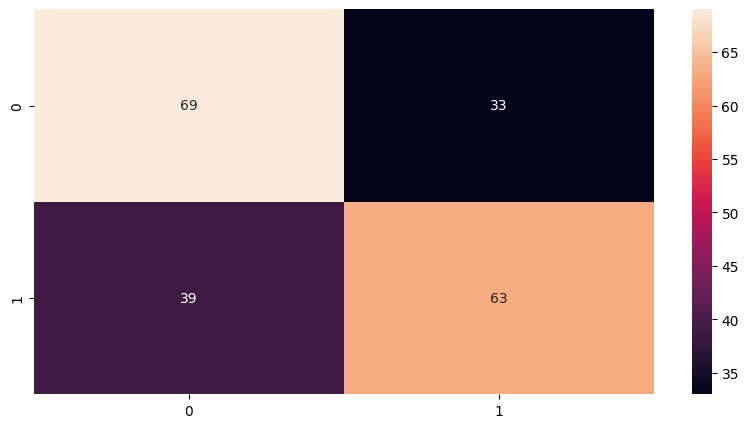

In [74]:
results=confusion_matrix(np.argmax(y_cat_test, axis=1), predicted_classes)
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(results,annot=True)

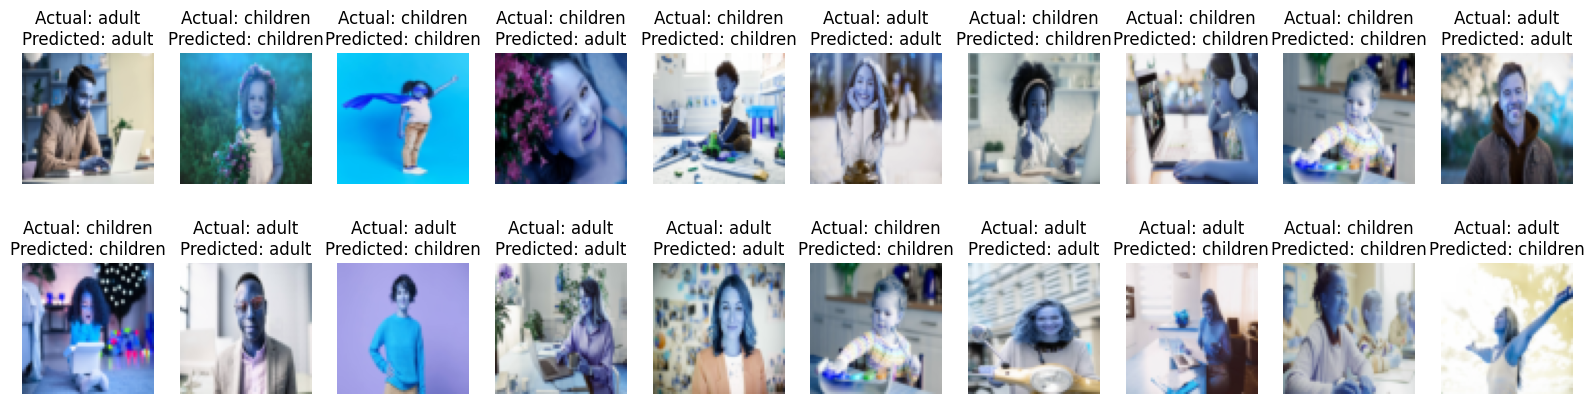

In [75]:
num_samples = 20
labels = ['adult', 'children']


plt.figure(figsize=(20,5))
for i in range(num_samples):
    index = random.randint(0, len(X_test) - 1)
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(X_test[index])
    plt.title(f"Actual: {labels[y_test[index]]}\nPredicted: {labels[predicted_classes[index]]}")
    plt.axis('off')

plt.show()

In [78]:
## SAVE THE MODEL 

from keras.models import load_model
model.save('Child_Detector(V2).h5')